# Tensorflow For MNIST

# Simple Linear Model

Lets use tensorflow to classify the MNIST dataset. This is a basic workflow using a linear model.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
tf.__version__

'1.3.0'

### Load Dataset

We now load the dataset from tensorflow.

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

/Users/nazilnoorani/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


We now check the dimensions of training set and test set to check the number of training and testing examples.

In [4]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


We see that dataset is split into three sets which are training, testing and validation.

### One Hot Encoding

The dataset has been loaded as one-hot encoding.

In [5]:
data.test.labels[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

We now get the class as a single number.

In [6]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

Lets check for first examples

In [7]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

### Data Dimensions

In [8]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

### Plotting Images Helper Function 

In [9]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Lets plot a few images.

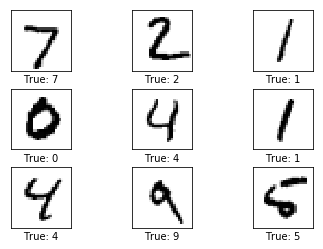

In [10]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

### Placeholder Variables

First we define the placeholder variables for the input images.

In [11]:
x = tf.placeholder(tf.float32, [None, img_size_flat])

Next, we have a placeholder variable for true labels of each image.

In [12]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

Now we assign the placeholder variable for the true class of each image.

In [13]:
y_true_cls = tf.placeholder(tf.int64, [None])

### Variables to be Optimized

The first variable is weights and the second one is biases.

In [14]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

### Model

We now create the model to classify our MNIST dataset.

In [16]:
logits = tf.matmul(x, weights) + biases

Lets predict the corresponding y's for the x used above.

In [17]:
y_pred = tf.nn.softmax(logits)

Let us now get the class of the predicted values.

In [18]:
y_pred_cls = tf.argmax(y_pred, axis=1)

### Cost Function to be Optimized

We now define the cross entropy for our model. This cross-entropy is going to be fo each training example.

In [20]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y_true)

We now calculate the cost which is the mean of all cross-entropies.

In [21]:
cost = tf.reduce_mean(cross_entropy)

### Optimization Method 

We now define our optimizer using Gradient Descent, with 0.5 as the learning rate and given that the cost, which is define above, has to be minimzed.

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

### Performance Measures 

We now calculate the performance by calculating the correct predictions which is a vector with rows equal to the number of examples and values being 1 or 0.

In [23]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

We also calculate the accuracies which is the percentage of correct numbers being predicted.

In [24]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Tensorflow Run

### Creating Tensorflow Session

In [26]:
session = tf.Session()

We now initialize the variblaes weights and biases.

In [27]:
session.run(tf.global_variables_initializer())

### Helper-function to perform optimization iterations

We use stochastic gradient descent in this case because the number of training examples is 50000 which is a big number.

In [28]:
batch_size = 100

Funtion for optimizing weights and biases.

In [29]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

### Helper-functions to show performance

In [30]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

Funtion for  printing accuracy on test set

In [31]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

Funtion for printing and plotting confusion matrix using scikit-learn.

In [32]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Function for plotting images of misclassified images.

In [33]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])


### Helper-function to plot the model weights

In [34]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

### Performance before any optimization 

In [35]:
print_accuracy()

Accuracy on test-set: 9.8%


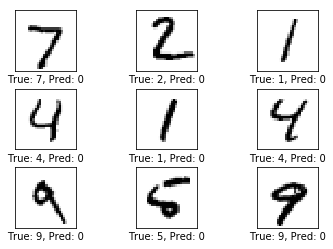

In [36]:
plot_example_errors()

### Performance after 1 optimization iteration

In [37]:
optimize(num_iterations=1)

In [38]:
print_accuracy()

Accuracy on test-set: 38.0%


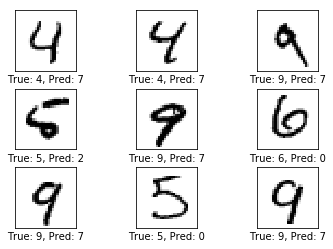

In [40]:
plot_example_errors()

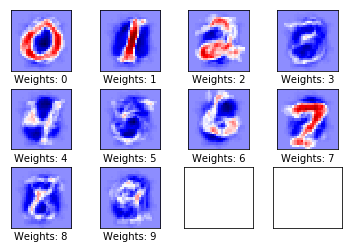

In [41]:
plot_weights()

### Performance after 10 optimization iterations

In [42]:
# We have already performed 1 iteration.
optimize(num_iterations=9)

In [43]:
print_accuracy()

Accuracy on test-set: 76.2%


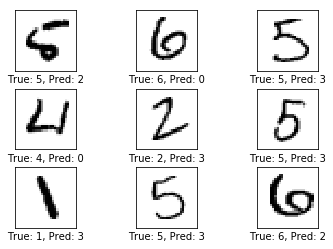

In [44]:
plot_example_errors()

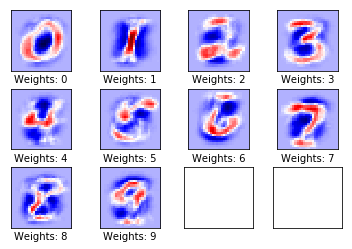

In [45]:
plot_weights()

### Performance after 1000 optimization iterations

In [46]:
# We have already performed 10 iterations.
optimize(num_iterations=990)

In [47]:
print_accuracy()

Accuracy on test-set: 92.0%


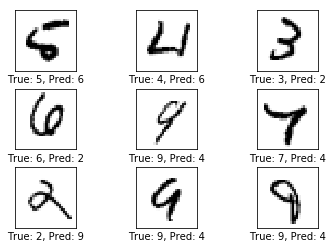

In [48]:
plot_example_errors()

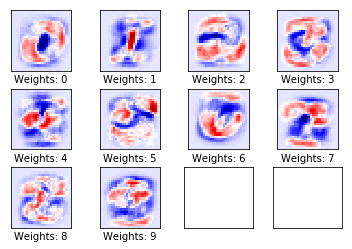

In [49]:
plot_weights()

[[ 961    0    4    1    0    2    8    1    3    0]
 [   0 1107    3    2    1    2    4    2   14    0]
 [   5    4  934   10   17    3   12   10   33    4]
 [   3    1   27  907    1   32    2   10   19    8]
 [   1    2    5    1  933    0   10    2    9   19]
 [  11    3    9   27   11  765   17    8   34    7]
 [   9    3    8    1   17    9  906    1    4    0]
 [   2    9   25    7   12    1    0  943    3   26]
 [   7    9    8   19   11   21   10   12  874    3]
 [   9    6    2   10   69    6    0   27   11  869]]


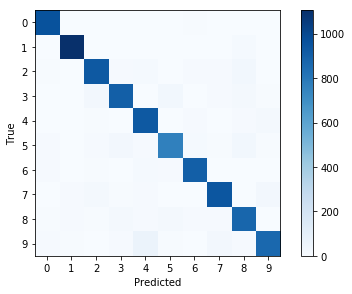

In [50]:
print_confusion_matrix()